In [1]:
import networkx as nx

In [2]:
# create a graph
G = nx.Graph()

## Nodes

In [3]:
# add nodes into the graph
G.add_node(1)
G.add_nodes_from([2, 3])

In [4]:
# creating a graph H with 10 nodes linearly connected
H = nx.path_graph(10)

In [5]:
# make graph H a node in graph G --> graph in graph
G.add_node(H)

In [6]:
# add all nodes in H into G
G.add_nodes_from(H)

## Edges

In [7]:
# add edges between nodes
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [8]:
# add a list of edges
G.add_edges_from([(1, 2), (1, 3)])

In [9]:
# add edges from another graph
G.add_edges_from(H.edges)

## Clear graph

In [10]:
G.clear()

In [11]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

## Getters

In [12]:
G.number_of_nodes()

8

In [13]:
G.number_of_edges()

3

In [15]:
# all nodes available
print(list(G.nodes))

# all edges
print(list(G.edges))

# neighbours of a particular node, in this case node 1
print(list(G.adj[1]))  # or list(G.neighbors(1))

# degree of the vertex, degree = number of edges - 1
print(G.degree[1])  # the number of edges incident to 1

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


In [16]:
# report edges and degrees of a list of nodes
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [17]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

## Setters

In [18]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))
G.remove_edge(1, 3)

[1, 3, 'spam']


## Additional ways to create a graph

In [19]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
print(list(H.edges()))
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
print(H.edges)

[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)]


## Access edges and nodes (additional getters and setters)

In [20]:
G[1]  # same as G.adj[1]

AtlasView({2: {}})

In [21]:
G[1][2]

{}

In [23]:
G.edges[1, 2]

{}

In [25]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
print(G[1])
print(G.edges[1, 2])

{2: {'color': 'red'}, 3: {'color': 'blue'}}
{'color': 'red'}


In [28]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    print(n,nbrs)
    for nbr, eattr in nbrs.items():
        print(nbr,eattr)
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

1 {2: {'weight': 0.125}, 3: {'weight': 0.75}}
2 {'weight': 0.125}
(1, 2, 0.125)
3 {'weight': 0.75}
2 {1: {'weight': 0.125}, 4: {'weight': 1.2}}
1 {'weight': 0.125}
(2, 1, 0.125)
4 {'weight': 1.2}
3 {1: {'weight': 0.75}, 4: {'weight': 0.375}}
1 {'weight': 0.75}
4 {'weight': 0.375}
(3, 4, 0.375)
4 {2: {'weight': 1.2}, 3: {'weight': 0.375}}
2 {'weight': 1.2}
3 {'weight': 0.375}
(4, 3, 0.375)


In [29]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


## Attributes getters and setters

### Graph attributes

In [36]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [37]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

### Node attributes

In [38]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes[1])

G.nodes[1]['room'] = 714
print(G.nodes.data())

{'time': '5pm'}
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]


### Edge attributes

In [41]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [47]:
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}, 2: {}, 4: {}, 5: {}})

In [48]:
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

## Directed graph

In [50]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight'))

print(DG.degree(1, weight='weight'))

print(list(DG.successors(1)))

print(list(DG.neighbors(1)))

0.5
1.25
[2]
[2]


## Multiple graphs

In [52]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [54]:
print(list(MG.adjacency()))

[(1, {2: {0: {'weight': 0.5}, 1: {'weight': 0.75}}}), (2, {1: {0: {'weight': 0.5}, 1: {'weight': 0.75}}, 3: {0: {'weight': 0.5}}}), (3, {2: {0: {'weight': 0.5}}})]


In [55]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## Analyzing graphs

In [57]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
print(list(nx.connected_components(G)))

print(sorted(d for n, d in G.degree()))

print(nx.clustering(G))

[{1, 2, 3}, {'spam'}]
[0, 1, 1, 2]
{1: 0, 2: 0, 3: 0, 'spam': 0}


In [58]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

## Drawing graphs

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

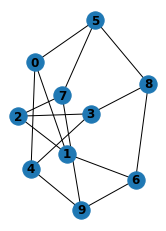

In [68]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')